# Pokemon Data Analysis #

The following notebook aims to address these questions:

1.  What is the best Pokemon type I could use to fight my opponent's Pokemon?

2.  How did the Pokemon designers go about distributing the character's abilities to make the game engaging (perhaps even addicting)?

3. Can we predict a legendary pokemon with minimal information? (Bonus Q - explored at the very end)

## 1. Install Libraries ##

In [205]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from pandasai import PandasAI
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
#include pySankey

In [517]:
#Optional: hide warnings
import warnings
warnings.simplefilter('ignore')

## 2. Data Validation ##

In [5]:
#Load data
data = pd.read_csv('./pokemon.csv')

#Display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data

abilities  against_bug  \
0                          ['Overgrow', 'Chlorophyll']         1.00   
1                          ['Overgrow', 'Chlorophyll']         1.00   
2                          ['Overgrow', 'Chlorophyll']         1.00   
3                             ['Blaze', 'Solar Power']         0.50   
4                             ['Blaze', 'Solar Power']         0.50   
5                             ['Blaze', 'Solar Power']         0.25   
6                             ['Torrent', 'Rain Dish']         1.00   
7                             ['Torrent', 'Rain Dish']         1.00   
8                             ['Torrent', 'Rain Dish']         1.00   
9                          ['Shield Dust', 'Run Away']         1.00   
10                                       ['Shed Skin']         1.00   
11                     ['Compoundeyes', 'Tinted Lens']         0.50   
12                         ['Shield Dust', 'Run Away']         0.50   
13                                       ['Shed Skin']         0.50   
14                                 ['Swarm', 'Sniper']         0.50   
15           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
16           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
17           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
18   ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...         1.00   
19   ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...         1.00   
20                              ['Keen Eye', 'Sniper']         0.50   
21                              ['Keen Eye', 'Sniper']         0.50   
22              ['Intimidate', 'Shed Skin', 'Unnerve']         0.50   
23              ['Intimidate', 'Shed Skin', 'Unnerve']         0.50   
24                          ['Static', 'Lightningrod']         1.00   
25          ['Static', 'Lightningrod', 'Surge Surfer']         1.00   
26   ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...         1.00   
27   ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...         1.00   
28               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
29               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
30          ['Poison Point', 'Rivalry', 'Sheer Force']         0.50   
31               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
32               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
33          ['Poison Point', 'Rivalry', 'Sheer Force']         0.50   
34       ['Cute Charm', 'Magic Guard', 'Friend Guard']         0.50   
35            ['Cute Charm', 'Magic Guard', 'Unaware']         0.50   
36   ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...         0.50   
37   ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...         0.50   
38       ['Cute Charm', 'Competitive', 'Friend Guard']         0.50   
39              ['Cute Charm', 'Competitive', 'Frisk']         0.50   
40                      ['Inner Focus', 'Infiltrator']         0.25   
41                      ['Inner Focus', 'Infiltrator']         0.25   
42                         ['Chlorophyll', 'Run Away']         1.00   
43                           ['Chlorophyll', 'Stench']         1.00   
44                     ['Chlorophyll', 'Effect Spore']         1.00   
45                ['Effect Spore', 'Dry Skin', 'Damp']         2.00   
46                ['Effect Spore', 'Dry Skin', 'Damp']         2.00   
47         ['Compoundeyes', 'Tinted Lens', 'Run Away']         0.50   
48      ['Shield Dust', 'Tinted Lens', 'Wonder Skin ']         0.50   
49   ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...         1.00   
50   ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...         1.00   
51   ['Pickup', 'Technician', 'Unnerve', 'Pickup', ...         1.00   
52   ['Limber', 'Technician', 'Unnerve', 'Fur Coat'...         1.00   
53                ['Damp', 'Cloud Nine', 'Swift Swim']         1.00   
54                ['Damp', 'Cloud Nine', 'Swift Swim']         1.00   
55          ['Vital Spirit', 'Anger Point', 'Defiant']         0.50  

### Variables ###

In [6]:
data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

- There are both qualitative variables (type 1, type 2, name, abilities) and quantitative variables (HP, base_total, attack, defense, speed, weight…)

Look at columns:

In [53]:
set(data['abilities'])

{"['Adaptability', 'Download', 'Analytic']",
 "['Aftermath', 'Unburden', 'Flare Boost']",
 "['Air Lock']",
 "['Anticipation', 'Dry Skin', 'Poison Touch']",
 "['Anticipation', 'Overcoat']",
 "['Aura Break', 'Power Construct']",
 "['Bad Dreams']",
 "['Battery']",
 "['Battle Armor', 'Sniper', 'Keen Eye']",
 "['Battle Armor', 'Swift Swim']",
 "['Battle Armor']",
 "['Beast Boost']",
 "['Berserk', 'Sap Sipper', 'Cloud Nine']",
 "['Big Pecks', 'Gale Wings']",
 "['Big Pecks', 'Overcoat', 'Weak Armor']",
 "['Big Pecks', 'Super Luck', 'Rivalry']",
 "['Blaze', 'Flash Fire']",
 "['Blaze', 'Intimidate']",
 "['Blaze', 'Iron Fist']",
 "['Blaze', 'Magician']",
 "['Blaze', 'Reckless']",
 "['Blaze', 'Solar Power']",
 "['Blaze', 'Speed Boost']",
 "['Blaze', 'Thick Fat']",
 "['Bulletproof', 'Soundproof', 'Overcoat']",
 "['Cheek Pouch', 'Pickup', 'Plus']",
 "['Chlorophyll', 'Early Bird', 'Pickpocket']",
 "['Chlorophyll', 'Effect Spore']",
 "['Chlorophyll', 'Gluttony']",
 "['Chlorophyll', 'Harvest', 'Frisk'

Too many combinations. Removal recommended.

In [14]:
set(data['classfication'])

{'Abundance Pokémon',
 'Acorn Pokémon',
 'Alpha Pokémon',
 'Angler Pokémon',
 'Ant Pit Pokémon',
 'Anteater Pokémon',
 'Antenna Pokémon',
 'Aquamouse Pokémon',
 'Aquarabbit Pokémon',
 'Arm Thrust Pokémon',
 'Armor Bird Pokémon',
 'Armor Pokémon',
 'Arrow Quill Pokémon',
 'Artificial Pokémon',
 'Astral Body Pokémon',
 'Atrocious Pokémon',
 'Attaching Pokémon',
 'Aura Pokémon',
 'Aurora Pokémon',
 'Automaton Pokémon',
 'Avianoid Pokémon',
 'Axe Jaw Pokémon',
 'Bagworm Pokémon',
 'Ball Pokémon',
 'Ball Roll Pokémon',
 'Ball Whale Pokémon',
 'Balloon Pokémon',
 'Barnacle Pokémon',
 'Barrier Pokémon',
 'Bash Buffalo Pokémon',
 'Bat Pokémon',
 'Battery Pokémon',
 'Beak Pokémon',
 'Beaver Pokémon',
 'Beckon Pokémon',
 'Bee Fly Pokémon',
 'Beehive Pokémon',
 'Bell Pokémon',
 'Big Boss Pokémon',
 'Big Eater Pokémon',
 'Big Horn Pokémon',
 'Big Jaw Pokémon',
 'Big Voice Pokémon',
 'Big-Hearted Pokémon',
 'Bird Pokémon',
 'Bite Pokémon',
 'Bivalve Pokémon',
 'Blade Pokémon',
 'Blade Quill Pokémon

Classification also has too many variable options for meaningful data analysis.

#### We have now removed columns that are not statistically relevant: abilities, classification, japanese_name, name. ####

Remaining Columns: 

- against_x** (see below)

- attack
- base_egg_steps
- base_happiness
- base_total
- capture_rate
- defense
- experience_growth
- height_m
- hp
- percentage_male
- pokedex_number
- sp_attack
- sp_defense
- speed
- type1
- type2
- weight_kg
- generation
- is_legendary


against_x:

- against_bug
- against_dark
- against_dragon
- against_electric
- against_fairy
- against_fight
- against_fire
- against_flying
- against_ghost
- against_grass
- against_ground
- against_ice
- against_normal
- against_poison
- against_psychic
- against_rock
- against_steel
- against_water

In [20]:
number_of_blanks = data['type2'].isnull().sum()

In [21]:
percentage_of_blanks = number_of_blanks / len(df) * 100

In [22]:
percentage_of_blanks

47.940074906367045

Type 2 has too many blanks, so we will opt for using Type 1 instead and dropping Type 2.

Of our remaining columns, the ones that are left AND are also numerical are:
Remaining Columns: 

- attack
- base_egg_steps
- base_happiness
- base_total
- capture_rate
- defense
- experience_growth
- height_m
- hp
- percentage_male
- pokedex_number
- sp_attack
- sp_defense
- speed
- weight_kg
- generation
- is_legendary


Our investigation can take us down a quantitaive path... or a qualitative path. 

Let's explore our remaining variables and see if they are continuous or categorical variables:

In [27]:
#Generation - which generation of pokemon?
set(data['generation'])

{1, 2, 3, 4, 5, 6, 7}

In [28]:
#Is Legendary? - is the pokemon legendary or not?
set(data['is_legendary'])

{0, 1}

Technically, generation and legendary are categories.

We will use still these two variables to create a new dataframe of all columns with numerical data, so they are not to be dismissed. 

In fact, they end up being very important later on.

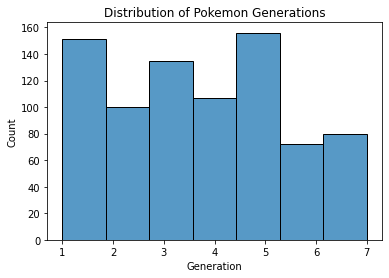

In [50]:
#Histogram of Generations, bins = # of generations
sns.histplot(data['generation'], bins=7)

plt.title('Distribution of Pokemon Generations')

plt.xlabel('Generation')
plt.ylabel('Count')

plt.show()

As we can see here, there is a pretty uniform distribution of Pokemon by generation, affirming that this variable only has categorical significance and is likely <strong>not a dependent variable</strong>. 

We are looking for continuous variables.

A good way to demonstrate this is to analyze a different variable, weight.

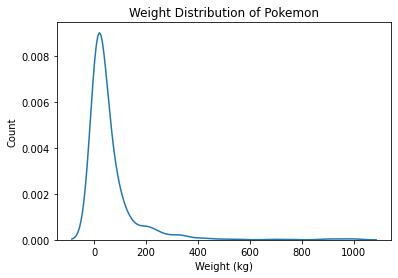

In [47]:
#KDE plot for generation
sns.kdeplot(data['weight_kg'])

plt.title('Weight Distribution of Pokemon')

plt.xlabel('Weight (kg)')
plt.ylabel('Count')

plt.show()

Here we have a KDE (kernel density estimate) with a continuous variable, such as weight.

#### Something like weight could reasonably be expected to correlate with height. ####

In [55]:
data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

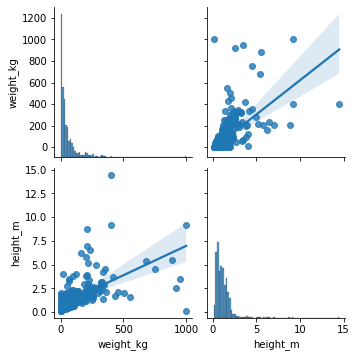

In [121]:
sns.pairplot(data[['weight_kg', 'height_m']], kind="reg")
plt.show()

In [61]:
# New df with weight and height columns
df = data[['weight_kg', 'height_m']]

In [64]:
df = df.dropna()

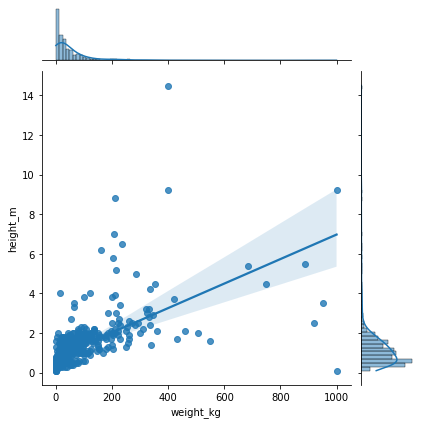

R:  0.6265511437853195 | P-Value: 2.143009087746084e-86


In [126]:
#Create a scatterplot with weight_kg and height_m
g = sns.jointplot(df, x='weight_kg', y='height_m', kind='reg')

#Pearson's R-value (correlation coefficient) and p-value (for statistical significance)
r, p = pearsonr(df['weight_kg'], df['height_m'])

plt.show()
print("R: ", r, "| P-Value:", p)

So far, that's not a particularly interesting finding, but it paves the way for the rest of our exploration.

When you have two variables with a high correlation, you can essentially reduce your variable space to only one of those variables because there would be a redundant effect (on the dependent variables). 

Later on, I will be using PCA for proper dimensionality reduction and to show trends and patterns in the data that would be difficult to see with looking at all the variables at once, that is why this preliminary step of data validation is incredibly important.

- weight_kg

Let's take one more peek at weight. Trying a different view.

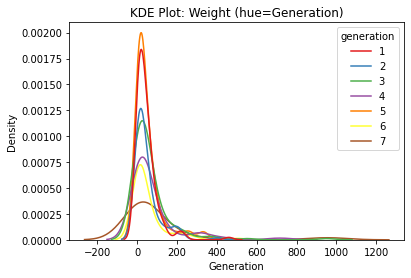

In [80]:
#KDE plot with color indicating generation
sns.kdeplot(data, x='weight_kg', hue='generation', fill=False, palette='Set1')
plt.title('KDE Plot: Weight (hue=Generation)')
plt.xlabel('Generation')
plt.ylabel('Density')
plt.show()

Here we can see some significant differences between the generations and weight distribution!

#### Maybe taking a look at generations will be interesting in the future. (Hint: it is!) ####

## 3. Forming a Hypothesis ##

We spent some time looking at our columns to see what information has been quantified and qualified about our Pokemon set. 

From those columns we identified two different groupings of interest: the numerical data and the categorical data.

From there, I will conduct two seperate analyses to answer two questions:

#### <u>Qualitative Approach</u>  ####

<strong> 1.  What is the best Pokemon type I could use to fight my opponent's Pokemon? </strong>

For this question, our answer (output) should be a <u>type</u> and our input is the <u>opponent's type.</u>

#### <u>Quantitative Approach - Dimensionality Reduction</u> ####

<strong> 2.  How did the Pokemon designers go about distributing the character's abilities to make the game engaging (perhaps even addicting)?</strong>

This question essentially asks what most data science inquiries look into:
- What are the underlying patterns we can see from the data? 
- What sort of trends can we spot and predict and with what accuracy? 

Frankly, this is the far more interesting question so the majority of the data analysis will focus on: 
- Correlations
- Pearson's R
- P-Values
- Logistic Regressions
- Principal Compopnent Analysis

<strong>Our final goal is to see with what accuracy we can predict a Legendary Pokemon from the least amount of variables.</strong>

## 4. Exploratory Analysis ##

### 1. What is the best Pokemon type I could use to fight my opponent's Pokemon? ###

In [118]:
#How many types are there?
len(set(data.type1))

18

In [119]:
types_columns = ['type1', 'against_bug', 'against_dark', 'against_dragon', 'against_electric',
                    'against_fairy', 'against_fight', 'against_fire', 'against_flying',
                    'against_ghost', 'against_grass', 'against_ground', 'against_ice',
                    'against_normal', 'against_poison', 'against_psychic', 'against_rock',
                    'against_steel', 'against_water']
len(types_columns)

19

In [98]:
#Create a new dataframe (types_df) with just 'type1' and 'against_x'
types_df = data[types_columns]
types_df.shape

(801, 19)

In [100]:
types_df.head()

type1  against_bug  against_dark  against_dragon  against_electric  \
0  grass          1.0           1.0             1.0               0.5   
1  grass          1.0           1.0             1.0               0.5   
2  grass          1.0           1.0             1.0               0.5   
3   fire          0.5           1.0             1.0               1.0   
4   fire          0.5           1.0             1.0               1.0   

   against_fairy  against_fight  against_fire  against_flying  against_ghost  \
0            0.5            0.5           2.0             2.0            1.0   
1            0.5            0.5           2.0             2.0            1.0   
2            0.5            0.5           2.0             2.0            1.0   
3            0.5            1.0           0.5             1.0            1.0   
4            0.5            1.0           0.5             1.0            1.0   

   against_grass  against_ground  against_ice  against_normal  against_poison  \
0           0.25             1.0          2.0             1.0             1.0   
1           0.25             1.0          2.0             1.0             1.0   
2           0.25             1.0          2.0             1.0             1.0   
3           0.50             2.0          0.5             1.0             1.0   
4           0.50             2.0          0.5             1.0             1.0   

   against_psychic  against_rock  against_steel  against_water  
0              2.0           1.0            1.0            0.5  
1              2.0           1.0            1.0            0.5  
2              2.0           1.0            1.0            0.5  
3              1.0           2.0            0.5            2.0  
4              1.0           2.0            0.5            2.0

In [112]:
#Group the dataframe by 'type1' and the average score of each type against_x
grouped_df = types_df.groupby('type1').mean()

In [116]:
print(grouped_df.shape)
grouped_df.head()

(18, 18)


against_bug  against_dark  against_dragon  against_electric  \
type1                                                                   
bug          0.826389      0.979167        0.937500          1.138889   
dark         1.724138      0.534483        1.103448          1.103448   
dragon       0.944444      1.037037        2.000000          0.490741   
electric     0.871795      1.000000        0.897436          0.538462   
fairy        0.472222      0.500000        0.000000          1.111111   

          against_fairy  against_fight  against_fire  against_flying  \
type1                                                                  
bug            0.916667       0.458333      2.194444        2.083333   
dark           2.275862       1.965517      1.034483        1.034483   
dragon         2.111111       0.925926      0.509259        1.055556   
electric       0.948718       1.064103      1.102564        0.474359   
fairy          1.000000       0.472222      1.000000        1.000000   

          against_ghost  against_grass  against_ground  against_ice  \
type1                                                                 
bug            1.013889       0.420139        0.562500     1.208333   
dark           0.551724       0.775862        0.965517     1.206897   
dragon         1.074074       0.527778        0.925926     2.518519   
electric       0.974359       0.910256        2.051282     1.025641   
fairy          1.000000       0.944444        0.888889     1.111111   

          against_normal  against_poison  against_psychic  against_rock  \
type1                                                                     
bug             0.930556        0.930556         1.159722      2.291667   
dark            0.931034        0.913793         0.000000      1.241379   
dragon          1.000000        0.925926         1.037037      1.111111   
electric        0.923077        0.935897         0.948718      1.025641   
fairy           1.000000        2.000000         1.000000      1.111111   

          against_steel  against_water  
type1                                   
bug            0.972222       1.020833  
dark           1.000000       1.000000  
dragon         1.000000       0.592593  
electric       0.500000       1.000000  
fairy          2.000000       1.000000

Nifty! This gets us started towards our visualization. Let's try a quick function.

In [151]:
#We can find the best opponent by taking the max of the column of the opponent.
against_bug_val = grouped_df['against_bug']

In [150]:
against_bug_val.max()

1.7241379310344827

In [139]:
against_values.idxmax()

'dark'

In [160]:
#Our index is our types so we cannot use iloc which is only for numerical indexes
#strongest_type = grouped_df.iloc[max(against_bug_val)]['type']

In [161]:
#We will use idxmax() instead
against_values.idxmax()

'dark'

Let's make a prediction algorithm:

In [164]:
#takes in opponent'type' and predicts strongest type against
def predict_strongest_types(input_type):
    
    against_column = 'against_' + input_type
    against_values = grouped_df[against_column]
    strongest_type = against_values.idxmax()

    return strongest_type

In [165]:
input_type = 'bug'

In [166]:
predicted_types = predict_strongest_types(input_type)
print(predicted_types)

dark


Nice! Let's make that into a dataframe so we can visualize it.

In [179]:
predicted_df = pd.DataFrame(columns=['type_opponent', 'type_predicted_best'])

In [180]:
for column in grouped_df.columns:
    if column.startswith('against_'):

        opponent_type = column.replace('against_', '')
        predicted_best_type = predict_strongest_types(opponent_type)

        predicted_df = predicted_df.append({'type_opponent': opponent_type, \
                                            'type_predicted_best': predicted_best_type},
                                           ignore_index=True)

In [184]:
print(predicted_df.shape)

(18, 2)


In [185]:
predicted_df

type_opponent type_predicted_best
0            bug                dark
1           dark             psychic
2         dragon              dragon
3       electric               water
4          fairy                dark
5          fight                rock
6           fire                 bug
7         flying                 bug
8          ghost             psychic
9          grass                rock
10        ground               steel
11           ice              flying
12        normal              dragon
13        poison               fairy
14       psychic              poison
15          rock                 bug
16         steel               fairy
17         water              ground

Neat! Let's visualize with the ever-so-popular Sankey Diagrams!

In [186]:
from pySankey.sankey import sankey

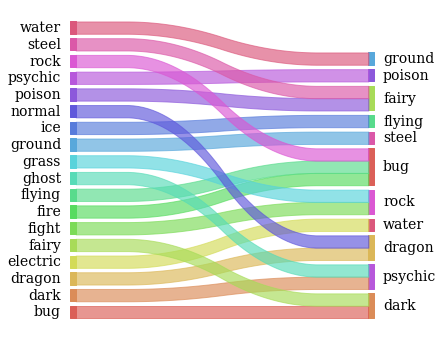

In [197]:
sankey(predicted_df['type_opponent'], predicted_df['type_predicted_best'])

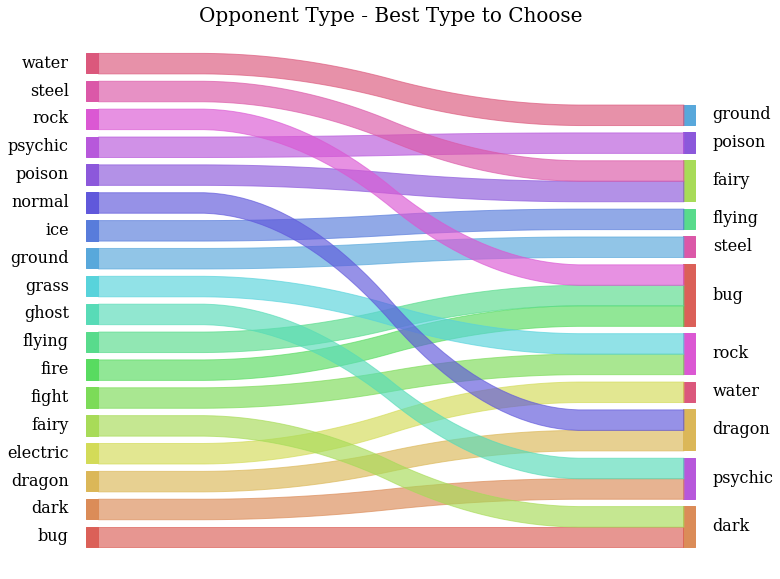

In [204]:
#Adjusting output size
sankey(predicted_df['type_opponent'], predicted_df['type_predicted_best'], fontsize=16)
plt.title("Opponent Type - Best Type to Choose", fontsize=20)
plt.gcf().set_size_inches((12, 10))
plt.show()

So pretty! So cool! So nostalgic! Moving on to a bigger challenge... Dimensionality Reduction.

### 2. What trends can we visualize? ###

We can start by choosing our selected numerical values and then looking at the correlation coefficient matrix for multiple variables.

<strong>Numerical Columns:</strong>
- attack
- base_egg_steps
- base_happiness
- base_total
- capture_rate
- defense
- experience_growth
- height_m
- hp
- percentage_male
- pokedex_number
- sp_attack
- sp_defense
- speed
- weight_kg
- generation
- is_legendary

In [206]:
num_cols = ['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
            'defense', 'experience_growth', 'height_m', 'hp', 'percentage_male',
            'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
            'weight_kg', 'generation', 'is_legendary']

In [210]:
num_df = data[num_cols]
print(num_df.shape)

(801, 19)


In [211]:
num_df.head()

attack  base_egg_steps  base_happiness  base_total capture_rate  defense  \
0      49            5120              70         318           45       49   
1      62            5120              70         405           45       63   
2     100            5120              70         625           45      123   
3      52            5120              70         309           45       43   
4      64            5120              70         405           45       58   

   experience_growth  height_m  hp  percentage_male  pokedex_number  \
0            1059860       0.7  45             88.1               1   
1            1059860       1.0  60             88.1               2   
2            1059860       2.0  80             88.1               3   
3            1059860       0.6  39             88.1               4   
4            1059860       1.1  58             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0

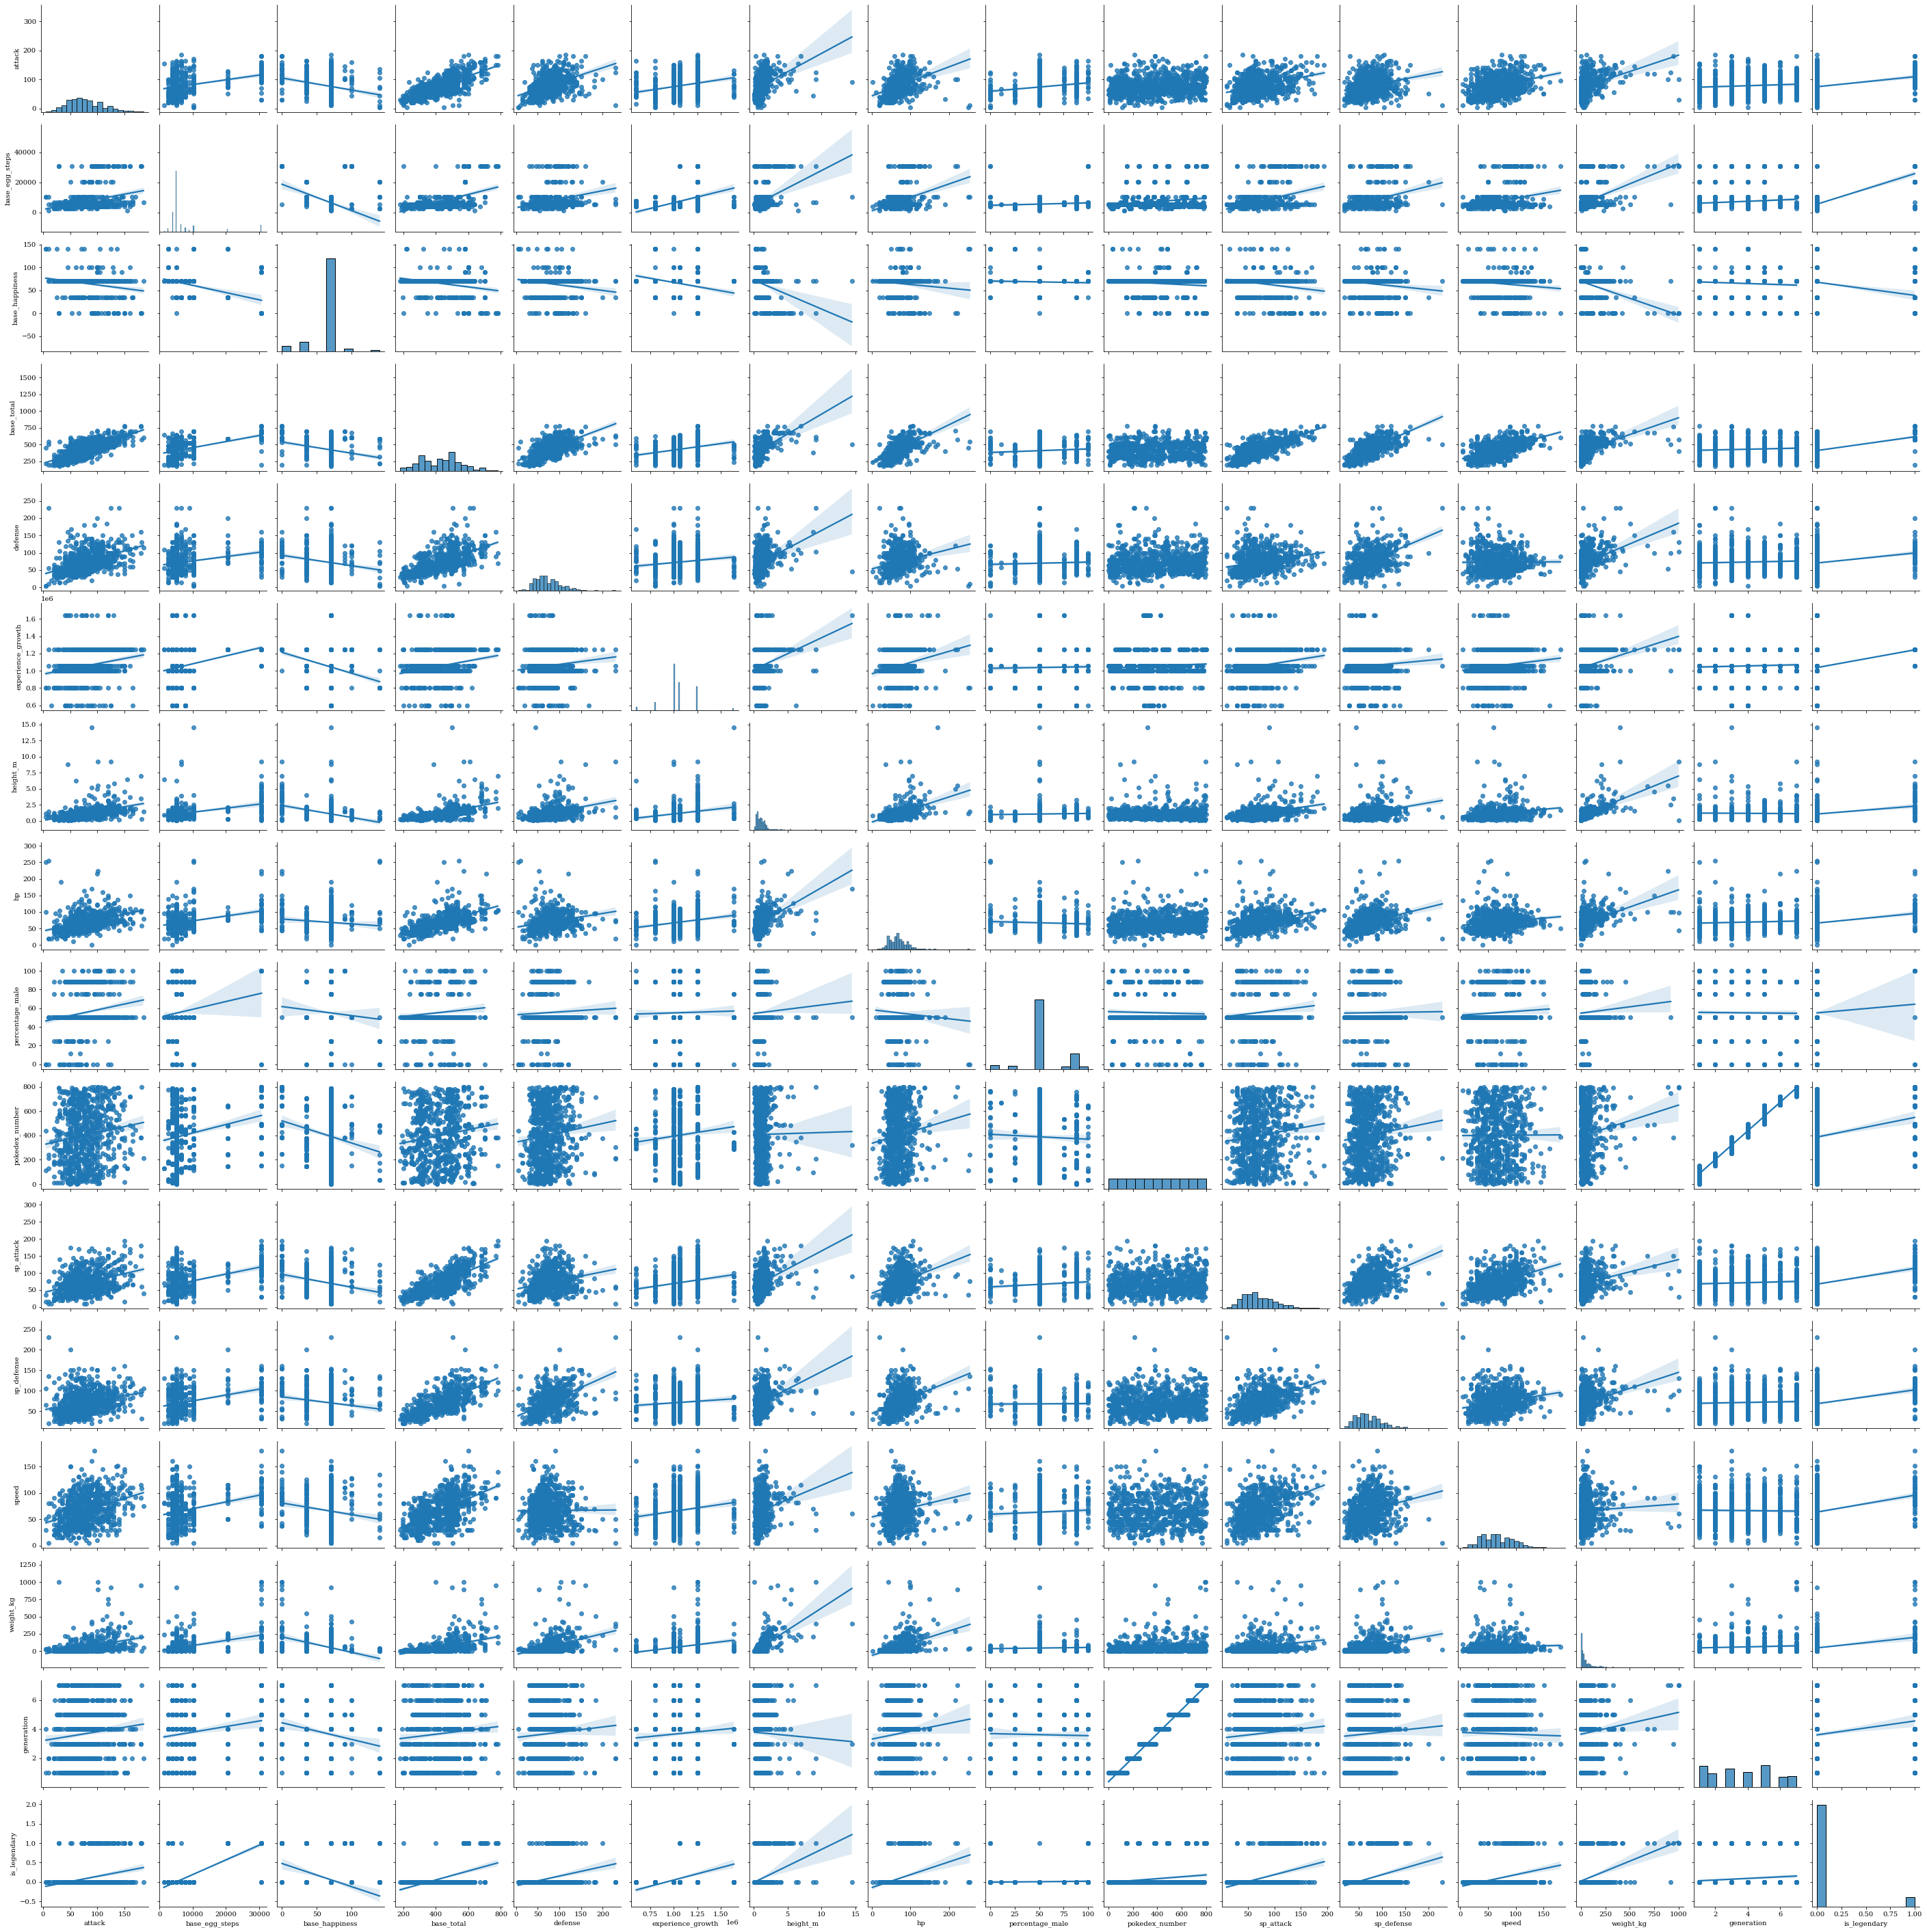

In [217]:
#Scatterplot with Linear Regression of entire dataframe for overview
sns.pairplot(num_df, kind='reg')

We can see a few trends emerging already.

Let's check out some correlations for more concrete data.

<Axes: >

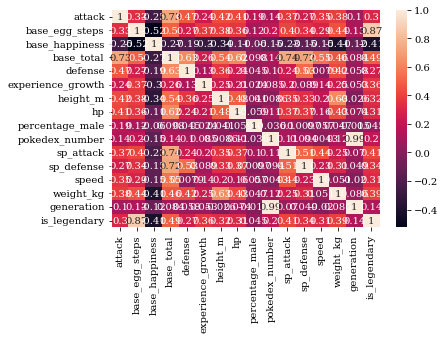

In [213]:
#Initial exploratory heatmap
sns.heatmap(num_df.corr(), annot=True)

Tight view. Let's take out the numbers with a low correlation.

In [273]:
#Assign corr to variable
correlation_matrix = num_df.corr()

In [222]:
#Extract the column pairs with correlations higher than 0.7 or -0.7
high_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

#Remove rows and columns where there is no high correlation
high_correlations = high_correlations.dropna(how='all')
high_correlations = high_correlations.dropna(axis=1, how='all')

In [223]:
#Make into Dataframe for easy visualization
high_correlations_df = pd.DataFrame(high_correlations)
high_correlations_df

attack  base_egg_steps  base_happiness  base_total  \
attack             1.000000             NaN             NaN    0.730134   
base_egg_steps          NaN        1.000000             NaN         NaN   
base_happiness          NaN             NaN             1.0         NaN   
base_total         0.730134             NaN             NaN    1.000000   
defense                 NaN             NaN             NaN         NaN   
experience_growth       NaN             NaN             NaN         NaN   
height_m                NaN             NaN             NaN         NaN   
hp                      NaN             NaN             NaN         NaN   
percentage_male         NaN             NaN             NaN         NaN   
pokedex_number          NaN             NaN             NaN         NaN   
sp_attack               NaN             NaN             NaN    0.741120   
sp_defense              NaN             NaN             NaN    0.717434   
speed                   NaN             NaN             NaN         NaN   
weight_kg               NaN             NaN             NaN         NaN   
generation              NaN             NaN             NaN         NaN   
is_legendary            NaN        0.873488             NaN         NaN   

                   defense  experience_growth  height_m   hp  percentage_male  \
attack                 NaN                NaN       NaN  NaN              NaN   
base_egg_steps         NaN                NaN       NaN  NaN              NaN   
base_happiness         NaN                NaN       NaN  NaN              NaN   
base_total             NaN                NaN       NaN  NaN              NaN   
defense                1.0                NaN       NaN  NaN              NaN   
experience_growth      NaN                1.0       NaN  NaN              NaN   
height_m               NaN                NaN       1.0  NaN              NaN   
hp                     NaN                NaN       NaN  1.0              NaN   
percentage_male        NaN                NaN       NaN  NaN              1.0   
pokedex_number         NaN                NaN       NaN  NaN              NaN   
sp_attack              NaN                NaN       NaN  NaN              NaN   
sp_defense             NaN                NaN       NaN  NaN              NaN   
speed                  NaN                NaN       NaN  NaN              NaN   
weight_kg              NaN                NaN       NaN  NaN              NaN   
generation             NaN                NaN       NaN  NaN              NaN   
is_legendary           NaN                NaN       NaN  NaN              NaN   

                   pokedex_number  sp_attack  sp_defense  speed  weight_kg  \
attack                        NaN        NaN         NaN    NaN        NaN   
base_egg_steps                NaN        NaN         NaN    NaN        NaN   
base_happiness                NaN        NaN         NaN    NaN        NaN   
base_total                    NaN    0.74112    0.717434    NaN        NaN   
defense                       NaN        NaN         NaN    NaN        NaN   
experience_growth             NaN        NaN         NaN    NaN        NaN   
height_m                      NaN        NaN         NaN    NaN        NaN   
hp                            NaN        NaN         NaN    NaN        NaN   
percentage_male               NaN        NaN         NaN    NaN        NaN   
pokedex_number           1.000000        NaN         NaN    NaN        NaN   
sp_attack                     NaN    1.00000         NaN    NaN        NaN   
sp_defense                    NaN        NaN    1.000000    NaN        NaN   
speed                         NaN        NaN         NaN    1.0        NaN   
weight_kg                     NaN        NaN         NaN    NaN        1.0   
generation               0.985904        NaN         NaN    NaN        NaN   
is_legendary                  NaN        NaN         NaN    NaN        NaN   

                   generation  is_legend

In some cases, high correlation between two variables indicates redundancy, implying that both variables provide similar information. In such situations, it might be beneficial to consider removing one of the variables to simplify the analysis or avoid issues related to <b>multicollinearity</b> in regression models.

Acommonly used guideline is that an R value above 0.7 or 0.8 indicates a high correlation between variables. In such cases, it suggests a strong linear relationship, and one of the variables might be redundant or provide redundant information. 

We saw such a relationship between weight and height, but at an R value around 0.6 -- in that particular situation there was a high left skew of the weight distribution which explains why they are not more highly correlated).

#### High Correlations R > 0.7 #### 

<Axes: >

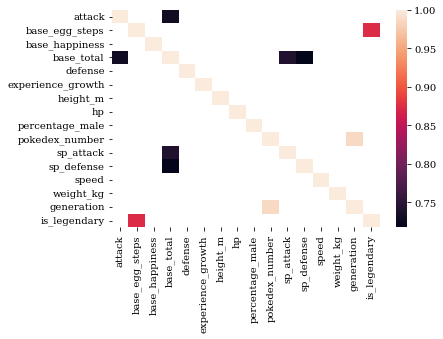

In [224]:
sns.heatmap(high_correlations_df)

Let's see if we were too stringent with our R cut-off values...

<b>Comparing strong correlations (R > 0.6) to high correlations (R > 0.7)</b>

In [225]:
#Extract the column pairs with correlations higher than 0.6 or -0.6
strong_correlations = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]

#Remove rows and columns where there is no high correlation
strong_correlations = strong_correlations.dropna(how='all')

In [229]:
#Make into Dataframe for easy visualization
strong_correlations_df = pd.DataFrame(strong_correlations)

<Axes: >

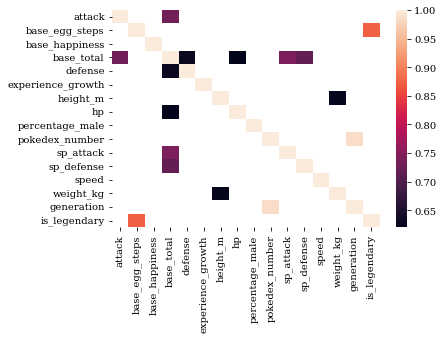

In [228]:
sns.heatmap(strong_correlations_df)

It looks like we can gain some valuable insights with a lower R-cutoff for our heatmap.
One obvious trend is that 'base_total' correlates with a few variables. As an aggregate measure, that would make sense, considering it is likely the numerical total of the points of some of the columns (Kaggle dataset does not specify exactly, so let's investigate further).

<b>Looking to see if base_num is indeed an aggregate measure...<b>

In [266]:
columns_to_check = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp']

In [267]:
sum_of_columns = num_df[columns_to_check].sum(axis=1)
is_combination = (sum_of_columns == num_df['base_total']).all()

if is_combination:
    print('base_total is a combination of ' + str(columns_to_check))
else:
    print('base_total is NOT a combination of ' + str(columns_to_check))

base_total is a combination of ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp']


### Let's see if we can make the visualization better using the strong_correlations and high_correlations dfs ###

<Axes: title={'center': 'Strong Correlations R > 0.6'}>

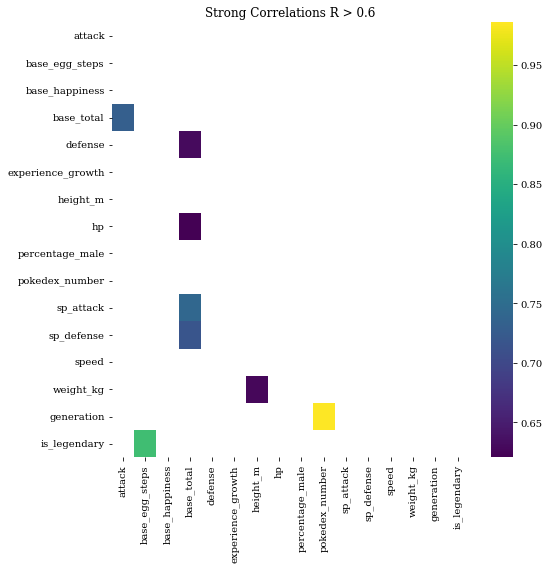

In [285]:
#Hide the upper half of the heatmap
matrix = np.triu(correlation_matrix)

#Create the heatmap and make it bigger
plt.figure(figsize=(8, 8))
plt.title('Strong Correlations R > 0.6')
sns.heatmap(strong_correlations_df, annot=False, cbar=True, mask=matrix, cmap='viridis')

<Axes: title={'center': 'High Correlations R > 0.7'}>

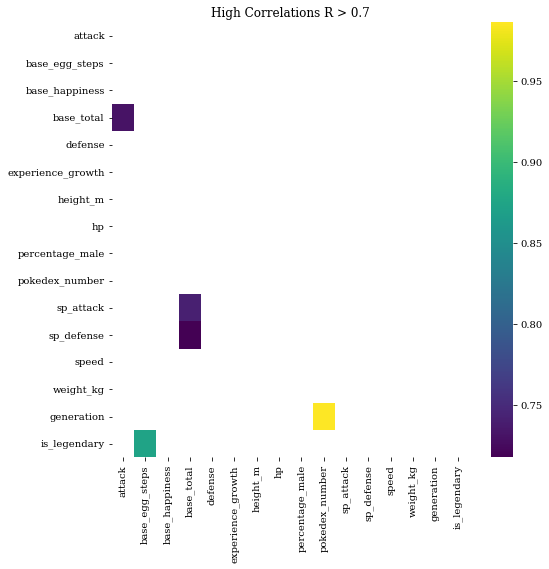

In [282]:
plt.figure(figsize=(8, 8))
plt.title('High Correlations R > 0.7')
sns.heatmap(high_correlations_df, annot=False, cbar=True, mask=matrix, cmap='viridis')

<Axes: title={'center': 'Strong Correlations R > 0.6'}>

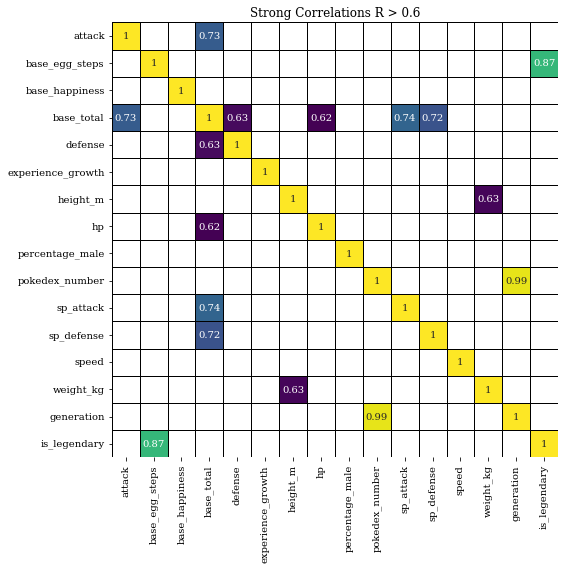

In [287]:
#Add lines and R-Values
plt.figure(figsize=(8, 8))
plt.title('Strong Correlations R > 0.6')
sns.heatmap(strong_correlations_df, annot=True, linecolor='k', linewidths=0.5, cbar=False, cmap='viridis')

<b>Highest Correlations (1.00 > R > 0.8):</b>
- generation and pokedex number
- is_legendary and base_egg_steps

<b>High Correlations (0.8 > R > 0.7):</b>
- base_total and sp_attack
- base_total and sp_defense
- base_total and attack

<b>Strong Correlations (0.7 > R > 0.6):</b>
- base_total and defense
- base_total and hp
- height_m and weight_kg

We can make another scatterplot with these variables just to illustrate certain trends.

In [353]:
#Demonstrating Weaker Correlations with Base Total
new_cols = ['attack', 'defense', 'sp_attack', 
            'sp_defense', 'speed', 'hp']

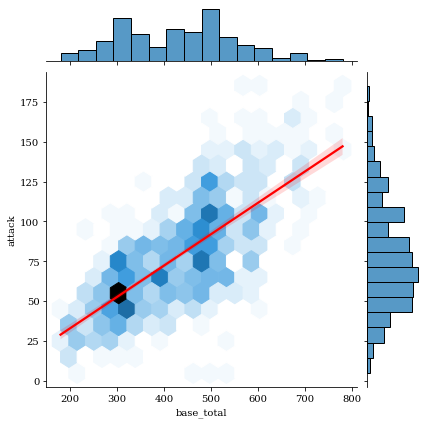

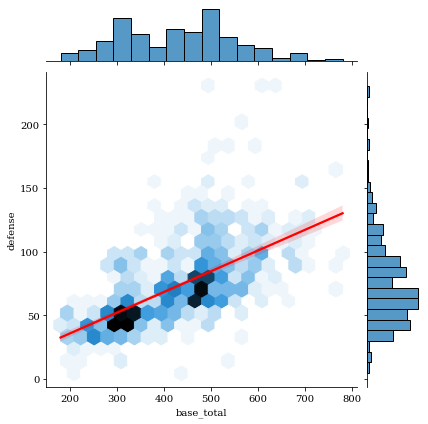

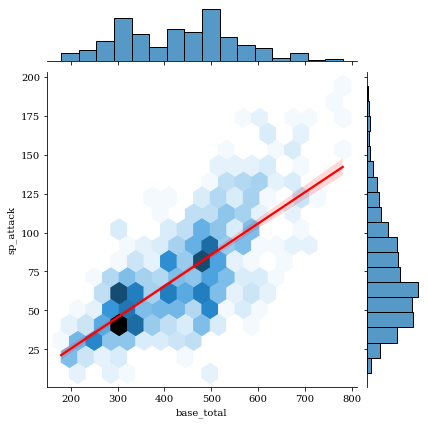

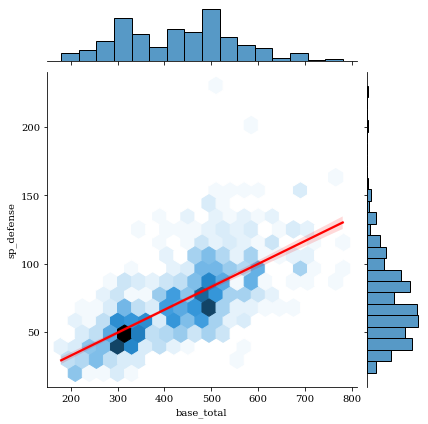

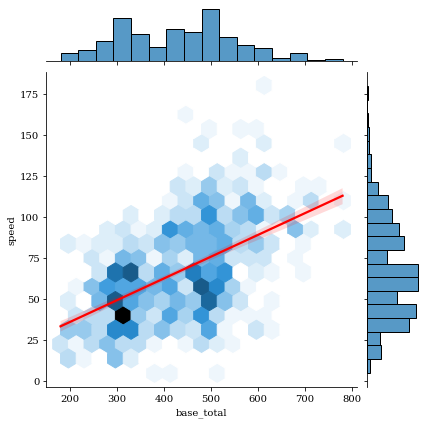

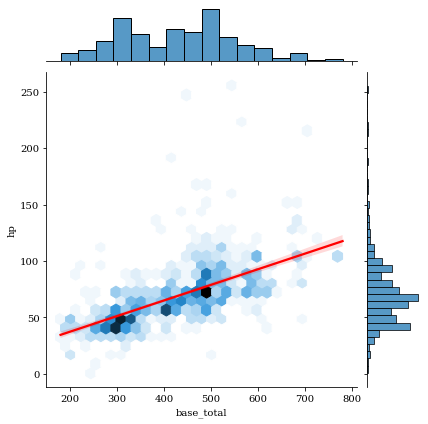

In [366]:
for i in range(len(new_cols)):
    x = 'base_total'
    y = new_cols[i]

    g = sns.jointplot(data=num_df, x=x, y=y, kind='hex')
    
    if not num_df[x].empty:
        sns.regplot(data=num_df, x=x, y=y, scatter=False, ax=g.ax_joint, color='r')

    plt.show()

You can clearly see the positive correlation between these variables (Regression Line in Red), but a more interesting trend emerges:

### There is a bimodal distribution in the base_total ###

### Once we figured out that base_total is an aggregate measure of several other variables, we can reduce those variables ('attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp') to just 'base_total' ###

We will go more into base_total in the next section. First, let's check out our Highest Correlations.

- generation and pokedex number
- is_legendary and base_egg_steps

### Generation and Pokedex Number ###

This is the most obvious correlation, given that as they added more Pokemon generations, they also added more numbers to the Pokemon Pokedex. 

Here is an illustration of the distribution:

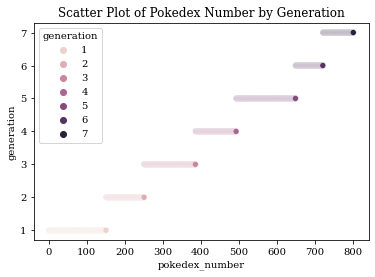

In [359]:
sns.scatterplot(df, x='pokedex_number', y='generation', hue='generation')
plt.title('Scatter Plot of Pokedex Number by Generation')
plt.show()

### Legendary and Base Steps ###

In [523]:
#Calculate the percentage of legendary Pokemon
num_legendary = df[df["is_legendary"] == 1].shape[0]
percentage = (num_legendary / df.shape[0]) * 100

print('There are ' + str(num_legendary) + ' Legendary Pokemon. The percentage of Legendary Pokemon Overall is ' + str(round(percentage, 2)) + '%')

There are 70 Legendary Pokemon. The percentage of Legendary Pokemon Overall is 8.74%


A simple scatterplot doesn't work here to give us many clues since we are working with only the variables 0 and 1 which act more like a categorical variable than a numerical one (technically we could have one-hot-encoded the categorical variables like this, but we were keeping it simple).

<Axes: xlabel='base_egg_steps', ylabel='is_legendary'>

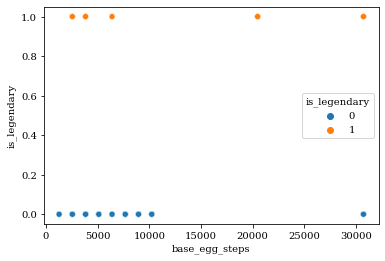

In [520]:
#Basic scatterplot of 
sns.scatterplot(df, x='base_egg_steps', y='is_legendary', hue='is_legendary')

We have to get creative, so we will do a scatterplot of just Base Egg Steps and highlight Legendary Pokemon.

This set-up shows a clear pattern.

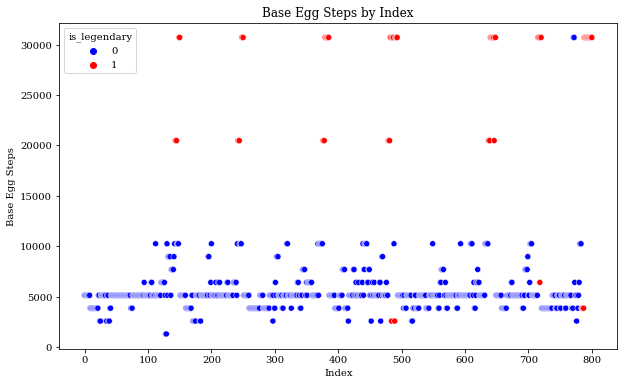

In [417]:
#Hue = Is Legendary
plt.figure(figsize=(10, 6)) 
ax = sns.scatterplot(data=df, x=df.index, y='base_egg_steps', hue='is_legendary', palette={0: 'blue', 1: 'red'})

ax.set_xlabel('Index')
ax.set_ylabel('Base Egg Steps')
plt.title('Base Egg Steps by Index')

plt.show()

Wow! A trend becomes obvious. It looks like the game designers reserved the legendary pokemon for those who commit to walking significantly more steps than average... around 20,000 to 30,000 steps. That makes sense! Making the legendary pokemon attainable only after a higher level of commitment ensures that users continue participating to get the *very* desireable prizes.

In [526]:
#Standard Deviation of Base Egg Steps
df['base_egg_steps'].std()

6558.2204218159295

In [398]:
#Average Base Egg Steps
df['base_egg_steps'].mean()

7191.011235955056

In [530]:
#Calculate how many standard deviations from the mean is 20,000 steps 
(20000 - df['base_egg_steps'].mean()) / df['base_egg_steps'].std()

1.9531195873557141

Approximately 95% of the data fall within two standard deviations of the mean. 
That means that only around 5% of users will reach a legendary Pokemon.

It looks like most legendary pokemon have a base_egg_steps higher than 20,000 -- let's check.

In [400]:
df_base_egg_steps_20k = df[df["base_egg_steps"] > 20000]

In [401]:
df_base_egg_steps_30k = df[df["base_egg_steps"] > 30000]

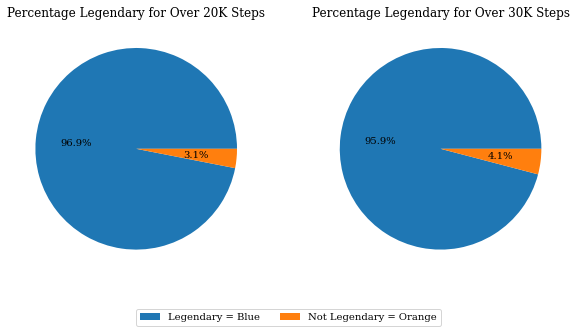

In [410]:
label = ['Legendary = Blue', 'Not Legendary = Orange']

percentage_20k = (df_base_egg_steps_20k[df_base_egg_steps_20k['is_legendary'] == 1].shape[0] / df_base_egg_steps_20k.shape[0]) * 100
percentage_30k = (df_base_egg_steps_30k[df_base_egg_steps_30k['is_legendary'] == 1].shape[0] / df_base_egg_steps_30k.shape[0]) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'top': 0.85, 'bottom': 0.15})

ax1.pie([percentage_20k, 100 - percentage_20k], autopct='%1.1f%%')
ax1.set_title('Percentage Legendary for Over 20K Steps')

ax2.pie([percentage_30k, 100 - percentage_30k], autopct='%1.1f%%')
ax2.set_title('Percentage Legendary for Over 30K Steps')

fig.legend(label, loc='lower center', ncol=2)

plt.show()

My supposition was indeed correct.

In [413]:
print('The percentage of legendary pokemon with a base egg step greater than 20,000 is ' + str(round(percentage_20k, 2)) + '%')
print('The percentage of legendary pokemon with a base egg step greater than 30,000 is ' + str(round(percentage_30k, 2)) + '%')

The percentage of legendary pokemon with a base egg step greater than 20,000 is 96.92%
The percentage of legendary pokemon with a base egg step greater than 30,000 is 95.92%


Amazing! Almost 97% of legendary pokemon require more than 20,000 steps to hatch. 

<strong>Let's investigate why:</strong>

The 'base_egg_steps' column provides information about the number of steps needed for the egg of a particular Pokémon species to hatch.

In the Pokémon games, trainers can obtain Pokémon eggs and carry them in their party. 

As trainers walk a certain number of steps, the egg undergoes an incubation process and eventually hatches into a Pokémon. 

It makes sense that more 'legendary' pokemon would be more difficult to acquire.

### What does this mean for our data? ###

- We were able to reduce 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed' and 'hp' to the variable 'base_total'

- We could see that base_steps is clearly correlated with 'is_legendary' so we can safely choose one to focus on (in this case 'is_legendary' is far more interesting)

- We were also able to identify that 'pokedex_number' is a sort of index variable, clearly correlating with the 'generation' data, indicating the two variables are somewhat interchangable but 'pokedex_number' (both are discrete)

We can use these three variables in our next part where we do a PCA on the data.

## 5. Final Analysis ##

In [418]:
data

abilities  against_bug  \
0                          ['Overgrow', 'Chlorophyll']         1.00   
1                          ['Overgrow', 'Chlorophyll']         1.00   
2                          ['Overgrow', 'Chlorophyll']         1.00   
3                             ['Blaze', 'Solar Power']         0.50   
4                             ['Blaze', 'Solar Power']         0.50   
5                             ['Blaze', 'Solar Power']         0.25   
6                             ['Torrent', 'Rain Dish']         1.00   
7                             ['Torrent', 'Rain Dish']         1.00   
8                             ['Torrent', 'Rain Dish']         1.00   
9                          ['Shield Dust', 'Run Away']         1.00   
10                                       ['Shed Skin']         1.00   
11                     ['Compoundeyes', 'Tinted Lens']         0.50   
12                         ['Shield Dust', 'Run Away']         0.50   
13                                       ['Shed Skin']         0.50   
14                                 ['Swarm', 'Sniper']         0.50   
15           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
16           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
17           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
18   ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...         1.00   
19   ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...         1.00   
20                              ['Keen Eye', 'Sniper']         0.50   
21                              ['Keen Eye', 'Sniper']         0.50   
22              ['Intimidate', 'Shed Skin', 'Unnerve']         0.50   
23              ['Intimidate', 'Shed Skin', 'Unnerve']         0.50   
24                          ['Static', 'Lightningrod']         1.00   
25          ['Static', 'Lightningrod', 'Surge Surfer']         1.00   
26   ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...         1.00   
27   ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...         1.00   
28               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
29               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
30          ['Poison Point', 'Rivalry', 'Sheer Force']         0.50   
31               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
32               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
33          ['Poison Point', 'Rivalry', 'Sheer Force']         0.50   
34       ['Cute Charm', 'Magic Guard', 'Friend Guard']         0.50   
35            ['Cute Charm', 'Magic Guard', 'Unaware']         0.50   
36   ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...         0.50   
37   ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...         0.50   
38       ['Cute Charm', 'Competitive', 'Friend Guard']         0.50   
39              ['Cute Charm', 'Competitive', 'Frisk']         0.50   
40                      ['Inner Focus', 'Infiltrator']         0.25   
41                      ['Inner Focus', 'Infiltrator']         0.25   
42                         ['Chlorophyll', 'Run Away']         1.00   
43                           ['Chlorophyll', 'Stench']         1.00   
44                     ['Chlorophyll', 'Effect Spore']         1.00   
45                ['Effect Spore', 'Dry Skin', 'Damp']         2.00   
46                ['Effect Spore', 'Dry Skin', 'Damp']         2.00   
47         ['Compoundeyes', 'Tinted Lens', 'Run Away']         0.50   
48      ['Shield Dust', 'Tinted Lens', 'Wonder Skin ']         0.50   
49   ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...         1.00   
50   ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...         1.00   
51   ['Pickup', 'Technician', 'Unnerve', 'Pickup', ...         1.00   
52   ['Limber', 'Technician', 'Unnerve', 'Fur Coat'...         1.00   
53                ['Damp', 'Cloud Nine', 'Swift Swim']         1.00   
54                ['Damp', 'Cloud Nine', 'Swift Swim']         1.00   
55          ['Vital Spirit', 'Anger Point', 'Defiant']         0.50  

<Axes: xlabel='base_total', ylabel='Density'>

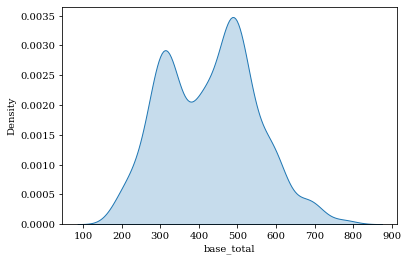

In [419]:
#Simple KDE plot of base_total to look at bimodal distribution
sns.kdeplot(num_df['base_total'], fill=True)

Aha! As expected - two peaks. This indicates two 'modes.' Let's look at another type of visualization.

We noticed a trend with weight and generation before, let's see if it is still the case here

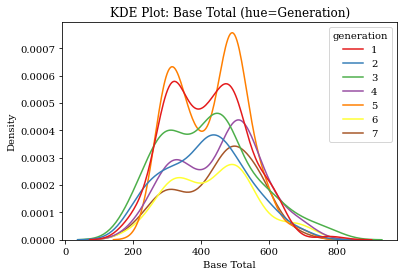

In [308]:
sns.kdeplot(data=num_df, x='base_total', hue='generation', fill=False, palette='Set1')
plt.title('KDE Plot: Base Total (hue=Generation)')
plt.xlabel('Base Total')
plt.ylabel('Density')
plt.show()

It's difficult to see this distribution with a scatterplot. 
We are using Pokedex Numeber because it is random and continuous.

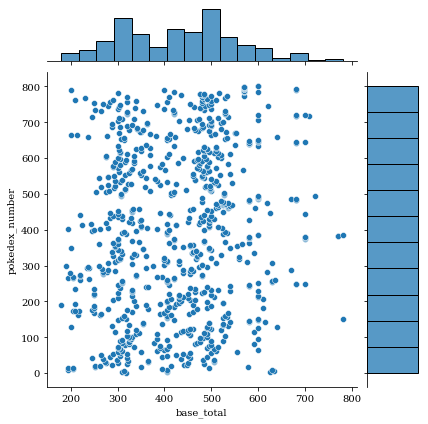

In [333]:
sns.jointplot(num_df, x='base_total', y='pokedex_number')

A pattern is more emergent with a KDE plot.

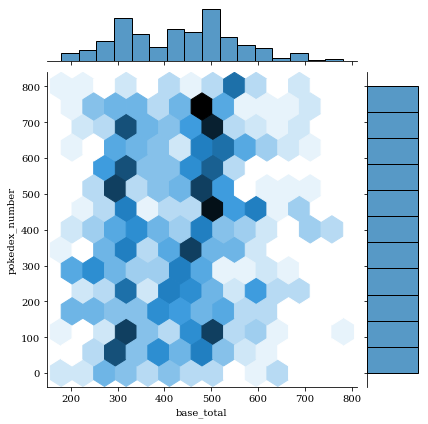

In [335]:
sns.jointplot(num_df, x='base_total', y='pokedex_number', kind='hex')

### This is where things get interesting... ###

Perhaps the distribution can be divided into two groups. There is an above average group and a below average group.

In [336]:
#We will be using just this df from now on...
df = num_df

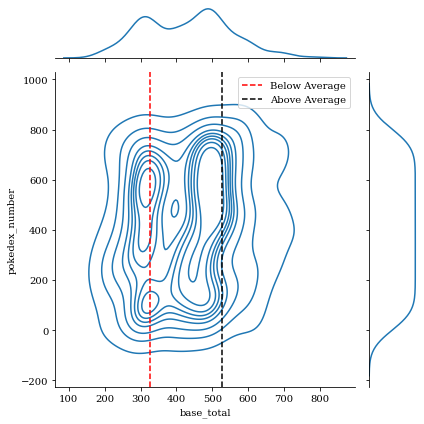

In [346]:
#Split the data into two distributions based on the mean
below_mean = df[df['base_total'] < df['base_total'].mean()]
above_mean = df[df['base_total'] >= df['base_total'].mean()]

#Create a jointplot for the 'base_total' and 'generation' variables
g = sns.jointplot(data=data, x='base_total', y='pokedex_number', kind='kde')

#Add a line to show the mean of each distribution (the below average and above average groupings)
g.ax_joint.axvline(below_mean['base_total'].mean(), color='red', linestyle='--', label='Below Average')
g.ax_joint.axvline(above_mean['base_total'].mean(), color='black', linestyle='--', label='Above Average')

g.ax_joint.legend()

plt.tight_layout()

plt.show()

That's pretty neat! Maybe we can go even further and identify Legendary Pokemon with a color.

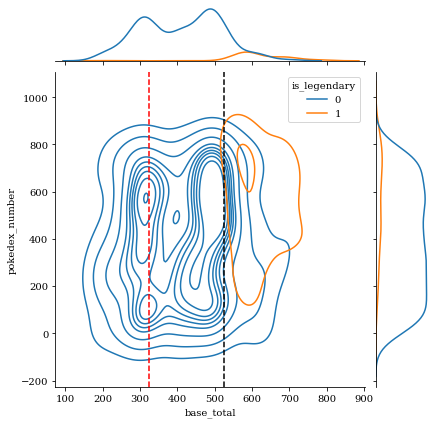

In [349]:
g = sns.jointplot(data=data, x='base_total', y='pokedex_number', kind='kde', hue='is_legendary')
g.ax_joint.axvline(below_mean['base_total'].mean(), color='red', linestyle='--', label='Below Average')
g.ax_joint.axvline(above_mean['base_total'].mean(), color='black', linestyle='--', label='Above Average')

plt.show()

This graph indicates that the game is set up to have two groups of Pokemon, an above average group and a below average group (denoted by the two higher density groupings around both the below average and above average demarcations).

It looks like the liklihood of getting an above average pokemon is slightly higher than the likelihood of getting a below average pokemon. This assumption is based on the fact that if you were to draw two overlapping bell curves, one for the below-average group and one for the above-average group, it appears that the area under the curve is higher for the above average group. However, the mean of the above average group does not line up with the largest bin of the histogram, so there must be other factors at play or ways to illustrate these relationships.

What further adds to this analysis is the labeling of Legendary pokemon. You can clearly see that the game developers kept the Legendary Pokemon base_total all in the above-average group, approximately one standard deviation above the above-average mean.

From this we can narrow our variables of interest to:
- generation
- pokedex_number
- is_legendary
- base_egg_steps

In [423]:
average = df['base_total'].mean()

In [429]:
#Calculate mean and standard deviation of above-average group
above_average_group = df[df['base_total'] > average]
mean_above = np.mean(above_average_group['base_total'])
std_above = np.std(above_average_group['base_total'])

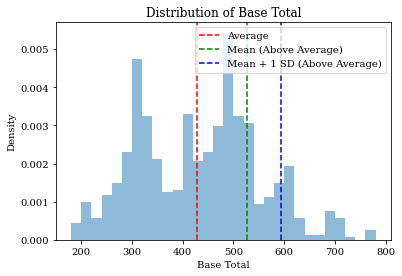

In [431]:
plt.hist(df['base_total'], bins=30, density=True, alpha=0.5)
plt.axvline(x=average, color='r', linestyle='--', label='Average')
plt.axvline(x=mean_above, color='g', linestyle='--', label='Mean (Above Average)')
plt.axvline(x=mean_above + std_above, color='b', linestyle='--', label='Mean + 1 SD (Above Average)')

plt.legend()

plt.xlabel('Base Total')
plt.ylabel('Density')
plt.title('Distribution of Base Total')

plt.show()

The above chart shows some of our unexplored hypotheses have potential to be true.

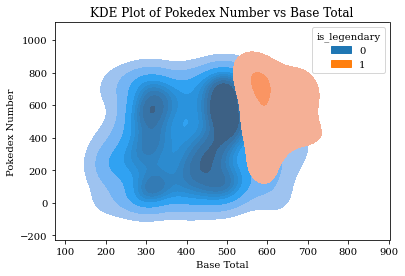

In [436]:
#Same graph as before but filled in
sns.kdeplot(data=df, x='base_total', y='pokedex_number', hue='is_legendary', fill=True)

plt.title('KDE Plot of Pokedex Number vs Base Total')

plt.xlabel('Base Total')
plt.ylabel('Pokedex Number')

plt.show()

## PCA (Principle Component Analysis) ##

We can safetly narrow our variables of interest to:
- base_total
- pokedex_number
- is_legendary

These will the 'features' in our PCA 

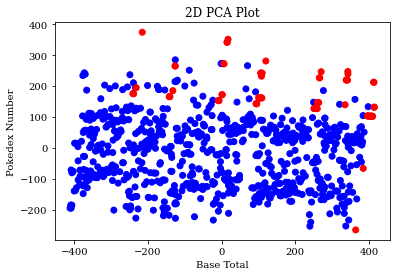

In [443]:
#Load the data
df

#Select the features
features = ['base_total', 'pokedex_number']

#Run PCA
pca = PCA(n_components=2)  
pca.fit(data[features])

#Get the principal components
principal_components = pca.transform(data[features])

#Define colors for each data point
colors = np.where(data['is_legendary'] == 1, 'red', 'blue')

#Plot the 2D PCA plot with customized colors
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors)

#Set labels and title
plt.xlabel('Base Total')
plt.ylabel('Pokedex Number')
plt.title('2D PCA Plot')

plt.show()

This plot isn't particularly pretty or informative. Let's see if a 3D PCA Plot can help.

### 3D PCA and KDE of Base Total ###

We applied PCA to do Dimensionality Reduction and Normalization on our features.

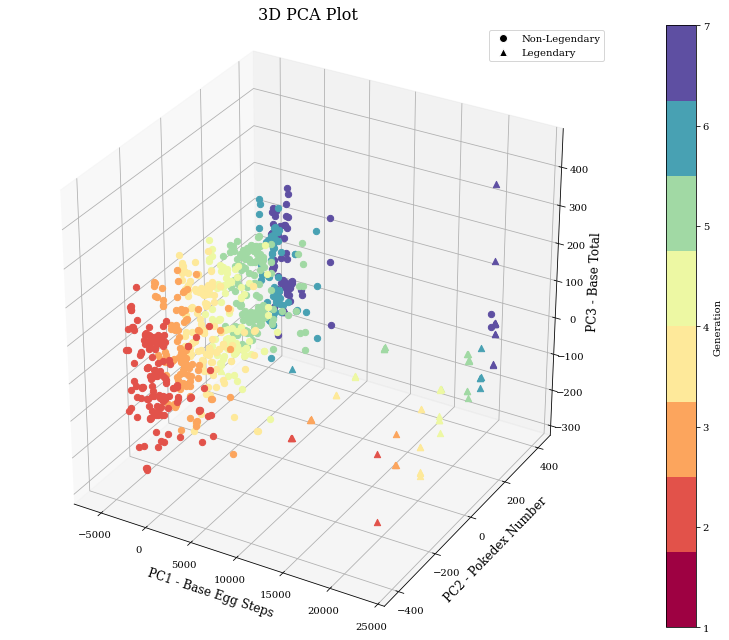

In [498]:
#Loading the data from the top to make sure there are no errors along the way
data = pd.read_csv('pokemon.csv')

#Selecting the features we identified by narrowing down our independent variables
features = ['base_total', 'pokedex_number', 'base_egg_steps']

#Run PCA
pca = PCA(n_components=3)
pca.fit(data[features])

#Get the principal components
principal_components = pca.transform(data[features])

#Define the colormap with a unique color for each generation
colormap = plt.cm.get_cmap('Spectral', 8)

#Define markers for each data point based on the 'is_legendary' column
markers = ['o' if value == 0 else '^' for value in data['is_legendary']]

#Set the figure size (Resolution is 1600 x 900)
plt.figure(figsize=(16, 9))

#Create the 3D plot
ax = plt.axes(projection='3d')

#Set Legendary to triangle markers
for i, marker in enumerate(markers):
    ax.scatter(principal_components[i, 0], principal_components[i, 1], principal_components[i, 2],
               c=colormap(data['generation'][i]), marker=marker, s=40)

#Set labels and title - continuous variable, independent variable
ax.set_xlabel('PC1 - Base Egg Steps', fontsize=12)
ax.set_ylabel('PC2 - Pokedex Number', fontsize=12)
ax.set_zlabel('PC3 - Base Total', fontsize=12)
ax.set_title('3D PCA Plot', fontsize=16)

#Add legend for is_legendary - discrete variable, dependent variable
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Non-Legendary', markerfacecolor='black', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='Legendary', markerfacecolor='black', markersize=8)
]
ax.legend(handles=legend_elements)

#Set the aspect ratio to equal
ax.set_box_aspect([1, 1, 1])

#Adjust the font size of tick labels
ax.tick_params(labelsize=10)

#Set the legend for colormap by generation - discrete variable, independent variable
sm = ScalarMappable(cmap=colormap)
sm.set_array(data['generation'])
cbar = plt.colorbar(sm)
cbar.set_ticks(range(1, 8))
cbar.set_label('Generation')

plt.tight_layout()

# Set x-label and y-label
g.set_axis_labels('Base Egg Steps', 'Generation')

#Set to 100 dpi
plt.savefig('pca_plot.png', dpi=100)

plt.show()

## 6. Discussion and Conclusion ##

Assuming you don't have the time to look through all of your Pokemon, a user would want a quick heuristic guide for seeing which Pokemon Type would be the best to choose in any given instance against a particular type of Pokemon.

To best demonstrate this, we created a new dataframe looking solely at "type1" and the "against_x" columns.

This resulted in a Sankey Diagram which was easy to read to give us the best pokemon type to defeat our opponent:

### Sankey Diagram ###

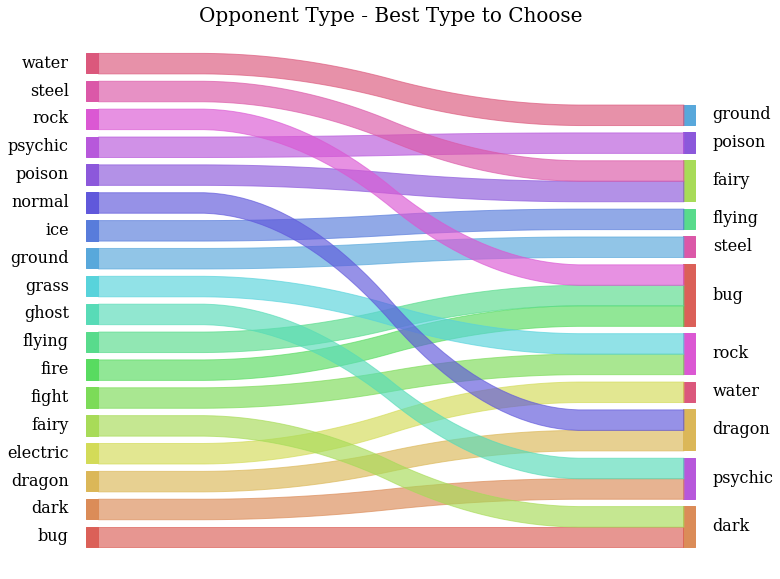

In [495]:
sankey(predicted_df['type_opponent'], predicted_df['type_predicted_best'], fontsize=16)
plt.title("Opponent Type - Best Type to Choose", fontsize=20)
plt.gcf().set_size_inches((12, 10))
plt.show()

### 3D PCA and KDE of Base Total ###

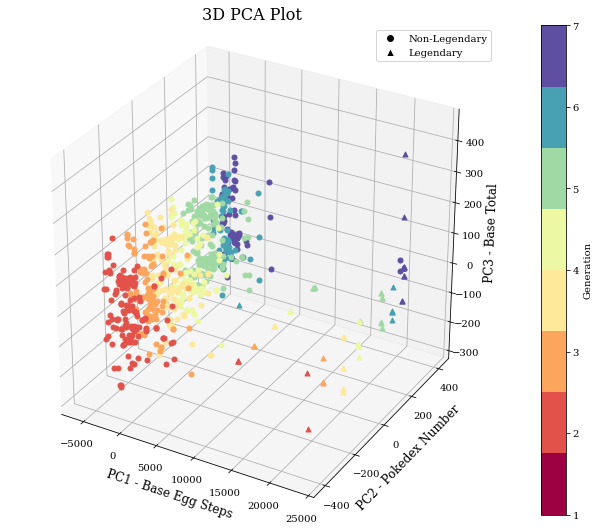

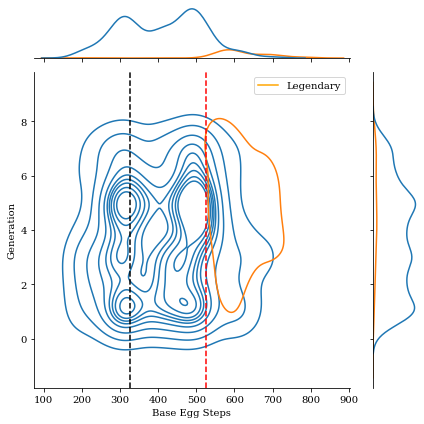

In [516]:
#Loading the data from the top to make sure there are no errors along the way
data = pd.read_csv('./pokemon.csv')

#Selecting the features we identified by narrowing down our independent variables
features = ['base_total', 'pokedex_number', 'base_egg_steps']

#Run PCA
pca = PCA(n_components=3)
pca.fit(data[features])

#Get the principal components
principal_components = pca.transform(data[features])

#Define the colormap with a unique color for each generation
colormap = plt.cm.get_cmap('Spectral', 8)

#Define markers for each data point based on the 'is_legendary' column
markers = ['o' if value == 0 else '^' for value in data['is_legendary']]

#Set the figure size (Resolution is 1600 x 900)
plt.figure(figsize=(16, 9))

#Create the 3D plot
ax = plt.axes(projection='3d')

#Set Legendary to triangle markers
for i, marker in enumerate(markers):
    ax.scatter(principal_components[i, 0], principal_components[i, 1], principal_components[i, 2],
               c=colormap(data['generation'][i]), marker=marker, s=25)

#Set labels and title - continuous variable, independent variable
ax.set_xlabel('PC1 - Base Egg Steps', fontsize=12)
ax.set_ylabel('PC2 - Pokedex Number', fontsize=12)
ax.set_zlabel('PC3 - Base Total', fontsize=12)
ax.set_title('3D PCA Plot', fontsize=16)

#Add legend for is_legendary - discrete variable, dependent variable
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Non-Legendary', markerfacecolor='black', markersize=8),
    Line2D([0], [0], marker='^', color='w', label='Legendary', markerfacecolor='black', markersize=8)
]
ax.legend(handles=legend_elements)

#Set the aspect ratio to equal
ax.set_box_aspect([1, 1, 1])

#Adjust the font size of tick labels
ax.tick_params(labelsize=10)

#Set the legend for colormap by generation - discrete variable, independent variable
sm = ScalarMappable(cmap=colormap)
sm.set_array(data['generation'])
cbar = plt.colorbar(sm)
cbar.set_ticks(range(1, 8))
cbar.set_label('Generation')

#Split the data into two distributions based on the mean
below_mean = data[data['base_total'] < data['base_total'].mean()]
above_mean = data[data['base_total'] >= data['base_total'].mean()]

#Create a jointplot for the 'base_total' and 'generation' variables
g = sns.jointplot(data=data, x='base_total', y='pokedex_number', kind='kde', hue='is_legendary')

#Add a line to show the mean of each distribution (the below average and above average groupings)
g.ax_joint.axvline(below_mean['base_total'].mean(), color='black', linestyle='--', label='Below Average')
g.ax_joint.axvline(above_mean['base_total'].mean(), color='red', linestyle='--', label='Above Average')

#Display the legend for the second graph
g.ax_joint.legend(['Below Average', 'Above Average'])

#Add a separate legend for the second graph to denote 'Legendary' with orange color
legend_elements2 = [
    Line2D([0], [0], color='orange', label='Legendary')
]
g.ax_joint.legend(handles=legend_elements2, loc='upper right')

g.ax_joint.add_artist(legend_elements[0])
g.ax_joint.add_artist(legend_elements[1])

# Set x-label and y-label
g.set_axis_labels('Base Egg Steps', 'Pokedex Number')

plt.tight_layout()

plt.savefig('pca_plot.png', dpi=100)

plt.show()

In [535]:
#Confirming relatively equal distribution of is_legendary
legendary_counts = df.groupby('generation')['is_legendary'].sum().reset_index()

In [537]:
legendary_counts

generation  is_legendary
0           1             5
1           2             6
2           3            10
3           4            13
4           5            13
5           6             6
6           7            17

### Conclusion ###

It is clear that there is a bimodal distribution of Base Total.

Legendary Pokemon are defined by the number is Base Egg Steps and Base Total.

Furthermore, generation trends do not show that legendary pokemon is concentrated in any particular generation.

### Discussion ###

The PCA and KDE shows clearly that Legendary pokemon are in a league of their own. Not only are they all centered in the above average portion of the KDE, they also primarily consist of the majority of Pokemon that 20,000 steps or more and have a high base total. The Pokedex Scale shows that there is a relatively similar distribution of Legendary pokemon per generation, evenly distributed across the Pokedex numbers.

#### How does this affect player strategy / incentives? ####

There is a near 50-50 chance of either getting an above average or below average pokemon which is estimated by a similar area under the KDE curve. This could makes someone continue to play (aka 'flip the proverbial coin') since their odds aren't particularly bad. 

Of course, the above average pokemon are not entirely distributed around the mean of the above-average group, but rather a bit below. This ensures that other factors such as strategy or dedication can lend itself toward giving weaker players an upper hand over time. 

As someone continues playing, the chances of getting a significantly better Pokemon (a legendary one) increase because there is a strong correlation between Base Egg Steps and Legendary Pokemon (R = 0.87). 

In fact, your likelihood of getting a Legendary Pokemon shifts to a 96% chance after 20,000 steps.


Players could easily become addicted to such favorable odds, considering that the number of Base Egg Steps that could likely guarentee someone a Legenary is only about 2 standard deviations from the mean. That means that 5% of users will likely get at least one Legendary Pokemon.

With a Base Total that is completely above average, these Legendary Pokemon are powerful and can likely beat most opponents based on stats alone.

With a look at our Type vs Type Sankey Diagram, we can see which Pokemon type has, on average across all Pokemon with that specific type, the best likelihood of beating your opponent's type. Thus, all other stats being equal, some attacks may be more effective than others depending on the Pokemon type. This supplementary data can help a user make an informed decision regarding which Pokemon to choose from their repeitoire.

### Bonus Question: Can we predict a legendary pokemon? With what accuracy? ###

We will be using Linear Regression to predict whether a Pokemon is legendary

In [541]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [556]:
df.head()

attack  base_egg_steps  base_happiness  base_total capture_rate  defense  \
0      49            5120              70         318           45       49   
1      62            5120              70         405           45       63   
2     100            5120              70         625           45      123   
3      52            5120              70         309           45       43   
4      64            5120              70         405           45       58   

   experience_growth  height_m  hp  percentage_male  pokedex_number  \
0            1059860       0.7  45             88.1               1   
1            1059860       1.0  60             88.1               2   
2            1059860       2.0  80             88.1               3   
3            1059860       0.6  39             88.1               4   
4            1059860       1.1  58             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0

In [558]:
#Split data into two parts
legendaryPokemon = df.loc[df['is_legendary'] == 1]
normalPokemon = df.loc[df['is_legendary'] == 0]

#Use same features as before
features = ['base_total', 'pokedex_number', 'base_egg_steps']

#Randomly sample non-legendary Pokémon to balance the dataset
sampledNormalPokemon = normalPokemon.sample(len(legendaryPokemon))

#Concatenate legendary and sampled non-legendary Pokémon
dataset = pd.concat([legendaryPokemon, sampledNormalPokemon])

#Split the dataset into training and testing sets
x = dataset[features]
y = dataset['is_legendary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [559]:
#Create an instance of the Logistic Regression classifier
classifier = LogisticRegression()

#Fit the classifier to the training data
classifier.fit(x_train, y_train)

#Predict the labels for the test data
y_pred = classifier.predict(x_test)

#Evaluate the performance of the classifier
accuracy = classifier.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9285714285714286


### Modeling Our Prediction Accuracy ###

In [560]:
#Prediction Dataframe
preds_df = pd.DataFrame({'is_legendary': y_test, 'is_legendary_pred': y_pred})

In [561]:
preds_df.head()

is_legendary  is_legendary_pred
539             0                  0
798             1                  1
490             1                  1
323             0                  0
644             1                  1

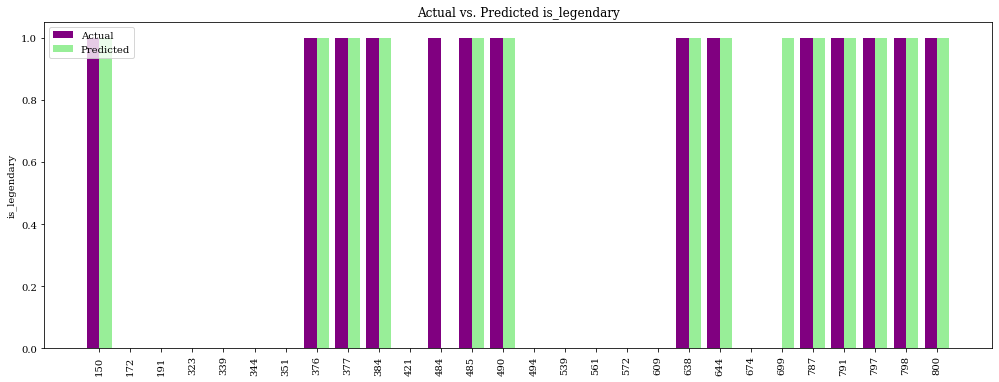

In [562]:
#Sort the DataFrame by index
data = preds_df.sort_index()

#Getting the number of data points
N = len(data)

#Set the bar width
width = 0.4

#Create the figure and axes
fig, ax = plt.subplots(figsize=(17, 6))

#Define the array of indices
ind = np.arange(N)

#Plot the actual values as a bar chart
ax.bar(ind, data['is_legendary'], width, label='Actual', color='#800080')

#Plot the predicted values as a bar chart
ax.bar(ind + width, data['is_legendary_pred'], width, label='Predicted', color='#98ee98')

#Set the title and axis labels
ax.set_title('Actual vs. Predicted is_legendary')
ax.set_ylabel('is_legendary')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(data.index)
plt.xticks(rotation=90)

#Display the legend
plt.legend()

#Show the plot
plt.show()

Adding more samples to our data...

In [563]:
df.head()

attack  base_egg_steps  base_happiness  base_total capture_rate  defense  \
0      49            5120              70         318           45       49   
1      62            5120              70         405           45       63   
2     100            5120              70         625           45      123   
3      52            5120              70         309           45       43   
4      64            5120              70         405           45       58   

   experience_growth  height_m  hp  percentage_male  pokedex_number  \
0            1059860       0.7  45             88.1               1   
1            1059860       1.0  60             88.1               2   
2            1059860       2.0  80             88.1               3   
3            1059860       0.6  39             88.1               4   
4            1059860       1.1  58             88.1               5   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0

In [564]:
df_test = df[features]

In [565]:
df_test.head()

base_total  pokedex_number  base_egg_steps
0         318               1            5120
1         405               2            5120
2         625               3            5120
3         309               4            5120
4         405               5            5120

In [567]:
#Apply PCA to the feature data of df_test
x_test_pca = pca.transform(df_test)

In [568]:
#Predict the labels for the PCA-transformed df_test data
y_pred_test = classifier.predict(x_test_pca)

In [569]:
# Merge df_test and preds_df_test on 'pokedex_number'
df_test = pd.merge(df_test, df[['pokedex_number', 'is_legendary']], on='pokedex_number', how='left')

#Show updated df_test
df_test

base_total  pokedex_number  base_egg_steps  is_legendary
0           318               1            5120             0
1           405               2            5120             0
2           625               3            5120             0
3           309               4            5120             0
4           405               5            5120             0
5           634               6            5120             0
6           314               7            5120             0
7           405               8            5120             0
8           630               9            5120             0
9           195              10            3840             0
10          205              11            3840             0
11          395              12            3840             0
12          195              13            3840             0
13          205              14            3840             0
14          495              15            3840             0
15          251              16            3840             0
16          349              17            3840             0
17          579              18            3840             0
18          253              19            3840             0
19          413              20            3840             0
20          262              21            3840             0
21          442              22            3840             0
22          288              23            5120             0
23          448              24            5120             0
24          320              25            2560             0
25          485              26            2560             0
26          300              27            5120             0
27          450              28            5120             0
28          275              29            5120             0
29          365              30            5120             0
30          505              31            5120             0
31          273              32            5120             0
32          365              33            5120             0
33          505              34            5120             0
34          323              35            2560             0
35          483              36            2560             0
36          299              37            5120             0
37          505              38            5120             0
38          270              39            2560             0
39          435              40            2560             0
40          245              41            3840             0
41          455              42            3840             0
42          320              43            5120             0
43          395              44            5120             0
44          490              45            5120             0
45          285              46            5120             0
46          405              47            5120             0
47          305              48            5120             0
48          450              49            5120             0
49          265              50            5120             0
50          425              51            5120             0
51          290              52            5120             0
52          440              53            5120             0
53          320              54            5120             0
54          500              55            5120             0
55          305              56            5120             0
56          455              57            5120             0
57          350              58            5120             0
58          555              59            5120             0
59          300              60            5120             0
60          385              61            5120             0
61          510              62            5120             0
62          310              63            5120             0
63          400              64      

In [571]:
#New df with df_test and Predicted values
preds_df_test = pd.DataFrame({'is_legendary': df_test['is_legendary'], 'is_legendary_pred': y_pred_test})

Accuracy: 92.0%


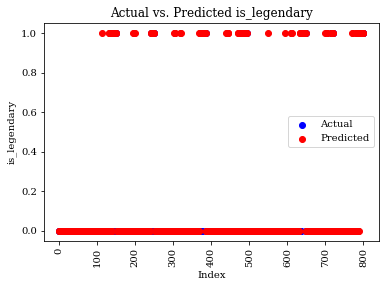

In [581]:
# Calculate the accuracy
accuracy = (preds_df_test['is_legendary'] == preds_df_test['is_legendary_pred']).mean()

# Create the scatter plot
plt.scatter(preds_df_test.index, preds_df_test['is_legendary'], label='Actual', color='blue')
plt.scatter(preds_df_test.index, preds_df_test['is_legendary_pred'], label='Predicted', color='red')

plt.title('Actual vs. Predicted is_legendary')
plt.xlabel('Index')
plt.ylabel('Is Legendary')
plt.xticks(rotation=90)
plt.legend()

#Add a text annotation for accuracy
print('Accuracy: ' + str(round(accuracy, 3) * 100) + '%')

plt.show()

### That's a really high accuracy from only three features! ###

Thank you for reaching my research on the Pokemon dataset!

Thank you to Angel Hack for the opportunity to work on this exciting data and showcase my skills with data analysis using Python, Seaborn, PCA, Linear Regression Classifiers and Jupyter Notebook. Also, thank you to Rohan Patil and Kaggle for the dataset. (https://www.kaggle.com/rohanpatil63)

### Notebook written by: Diana Ciuca | dianaciu.ca | dianaciuca@gmail.com ###